# Classifying Irises
This demo shows how to build a decision tree and random forest classifier using Scikit-learn for a dataset that does not require any preprocessing. It is referred to in the hierarchical clustering demo (hierarchical-clustering.ipynb) where we weight features using (optionally) the feature weights from the models in this demo.

We use the well-known iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set) which is available from several sources including from Scikit-learn directly.

First we'll import matplotlib and everything we need from Scikit-learn.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

## Decision tree classifier
Decision trees are not as accurate as some other types of model (we'll compare with a random forest shortly), but a single decision tree is easier to examine and interpret. Here we build and plot a decision tree. This will enable us to see that the petal length and petal width features are more useful for this classification task.

First we create a DecisionTreeClassifier object. There are some parameters that might affect the size of the tree and how it is built. We can experiment with these.

In [5]:
clf_tree = DecisionTreeClassifier(
    min_samples_split=25,
    min_samples_leaf=25,
    random_state=7,
)

We now create our decision tree by fitting the training data.

In [6]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=25, min_samples_split=25,
                       random_state=7)

The plot_tree function lets us inspect the decision tree.

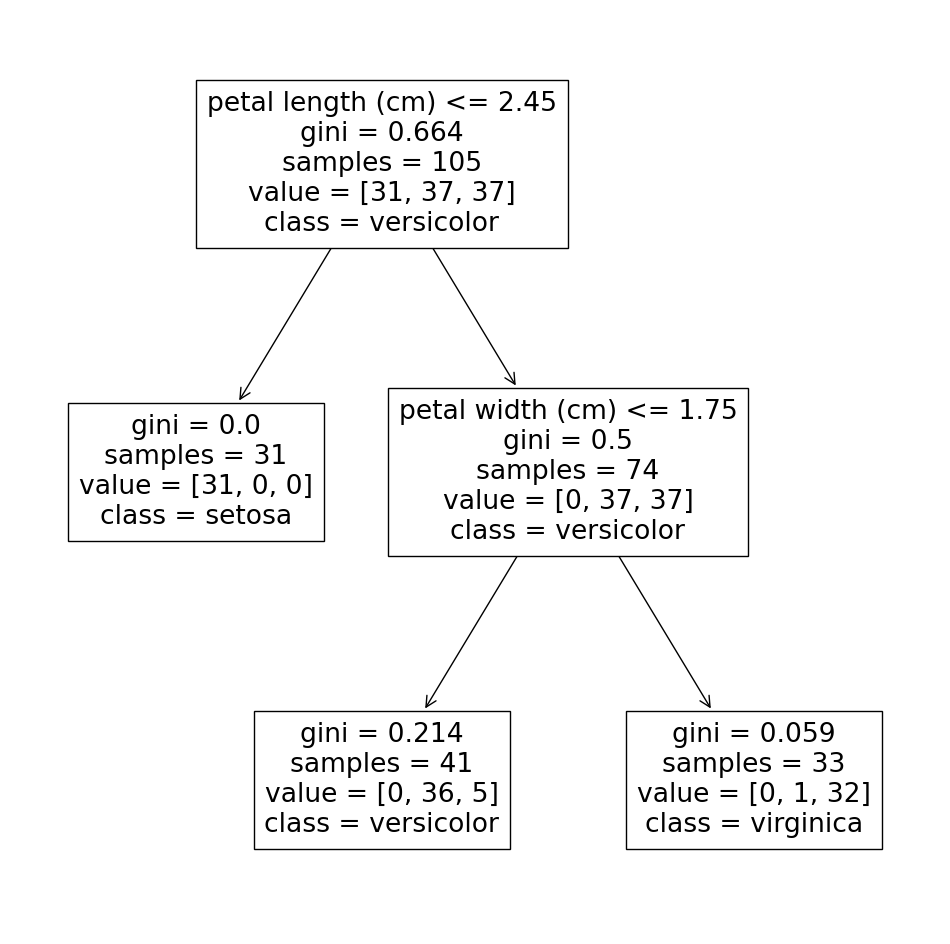

In [7]:
plt.figure(figsize=(12, 12))  # set plot size (denoted in inches)
plot_tree(clf_tree,
          feature_names=list(X.columns),
          class_names=['setosa', 'versicolor', 'virginica']
          )
plt.show()

We can use our decision tree to predict the class of all irises in the test set.

In [8]:
y_pred_tree = clf_tree.predict(X_test)

We now evaluate the accuracy of the decision tree by comparing the model's predictions with the actual labels in the test set.

In [9]:
print(f'Tree accuracy: {accuracy_score(y_test, y_pred_tree)}')

Tree accuracy: 1.0


In Scikit-learn, tree-based models allow us to inspect the importance of each feature.

In [10]:
print(f'Tree feature importances: {clf_tree.feature_importances_}')

Tree feature importances: [0.         0.         0.55496308 0.44503692]


This probably makes more sense when we graph it:

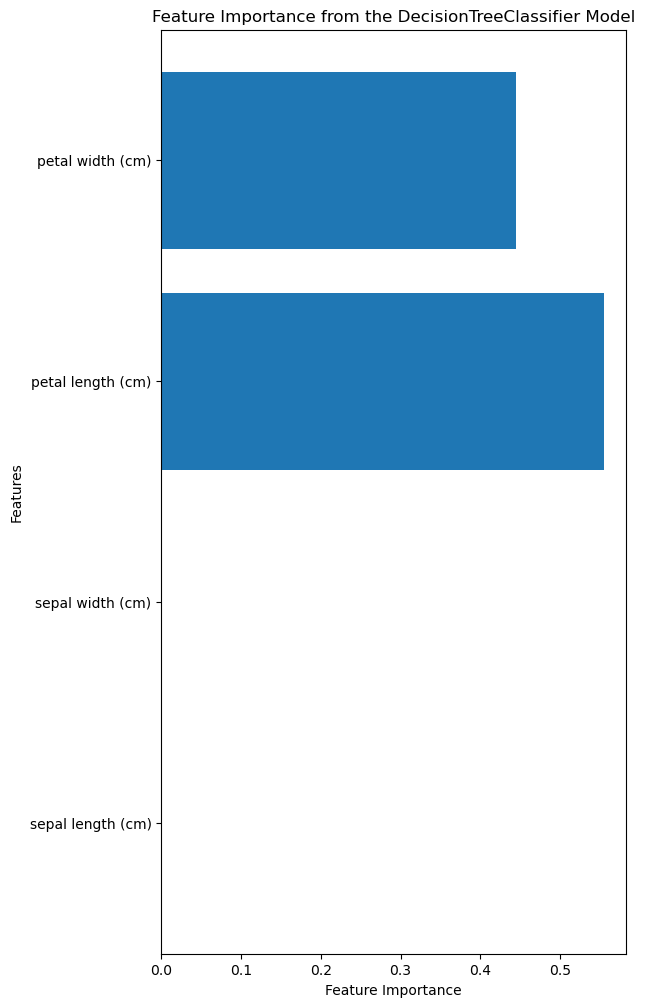

In [11]:
plt.figure(figsize=(6, 12))
plt.barh(X.columns, clf_tree.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from the DecisionTreeClassifier Model')
plt.show()

Note that the feature importances are specific to the trained model and will likely change if we change it (e.g. using different training data or initialise it with different parameter values that affect the tree structure). For example, setting min_samples_split=4 means that the decision tree can no longer include the question "sepal length (cm) <= 1.341" because the node only had 3 samples at that point. Making a decision based on so few samples could hurt the generality of the model due to overfitting. A simpler model may do better on unseen data even if it does slightly worse on the training data and give us a better estimate of the real feature importances.

## Random forest classifier
With this small dataset, we get excellent accuracy with a single decision tree. Random forest models consist of multiple decision trees and generally perform better on more realistic datasets. Here we will build a RandomForestClassifier model and see that the design of scikit-learn means that this is no more difficult than building the DecisionTreeClassifier model.

We will follow the same steps. First create our RandomForestClassifier object.

In [12]:
clf_forest = RandomForestClassifier()

Next, fit the model to to the data. The different types of model are designed to be as consistent as possible, so we can use the fit method here too.

In [13]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier()

And we get the predictions for the classes in the test set in the same way.

In [14]:
y_pred = clf_forest.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Now we'll get the accuracy.

In [15]:
accuracy_score(y_test, y_pred)

1.0

Random forst models also allow us to inspect feature importances.

In [16]:
clf_forest.feature_importances_

array([0.09961062, 0.03138848, 0.357273  , 0.51172791])

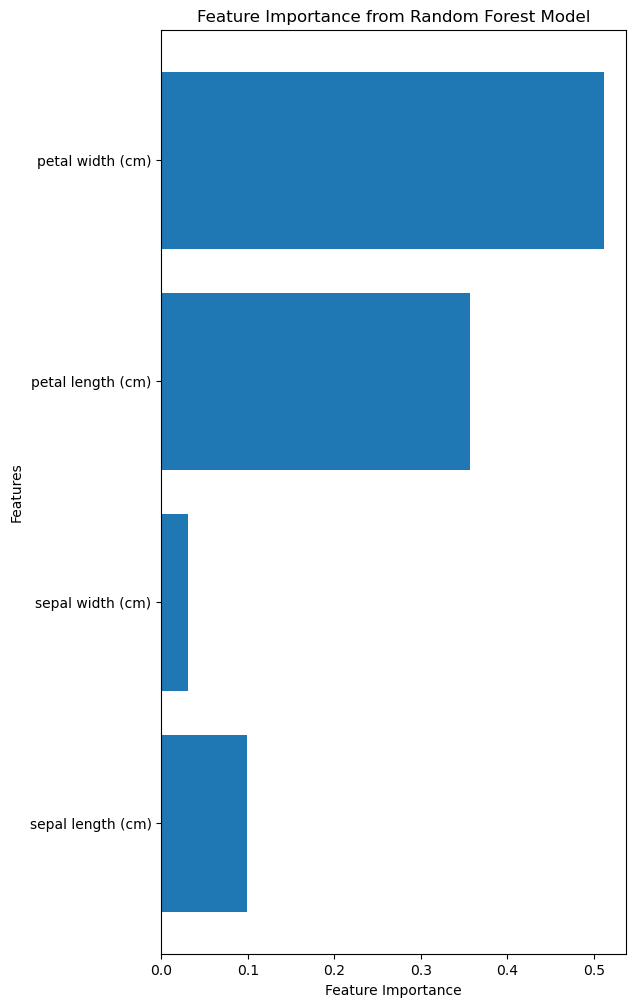

In [17]:
plt.figure(figsize=(6, 12))
plt.barh(X.columns, clf_forest.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.show()

If desired, we can scale these so that the maximum value is 1, making it easier to compare their relative importance

In [18]:
clf_forest.feature_importances_ / max(clf_forest.feature_importances_)

array([0.19465543, 0.06133822, 0.69816985, 1.        ])

And same for the decision tree: 

In [19]:
clf_tree.feature_importances_ / max(clf_tree.feature_importances_)

array([0.        , 0.        , 1.        , 0.80192166])